## K-means
   - 군집화에서 가장 일반적인 알고리즘
   - 군집 중심 이라느 임의의 지점을 선택해서 해당 줌심에 가장 가까운 포인트들을 선택하는 군집화
   - 일반적인 군집화에서 가장 많이 사용되는 기법
   - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어짐

### iris 데이터로 실습

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

### (cm)를 치는것이 불편하여 제거하는 작업을 해보았다

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

### iris 데이터 정리

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 편의상 두 개의 특성만을 사용하도록 하겠다

In [5]:
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### 군집화 시작

In [6]:
model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 결과 라벨

In [7]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 군집의 중심값

In [8]:
model.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [9]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


### 결론

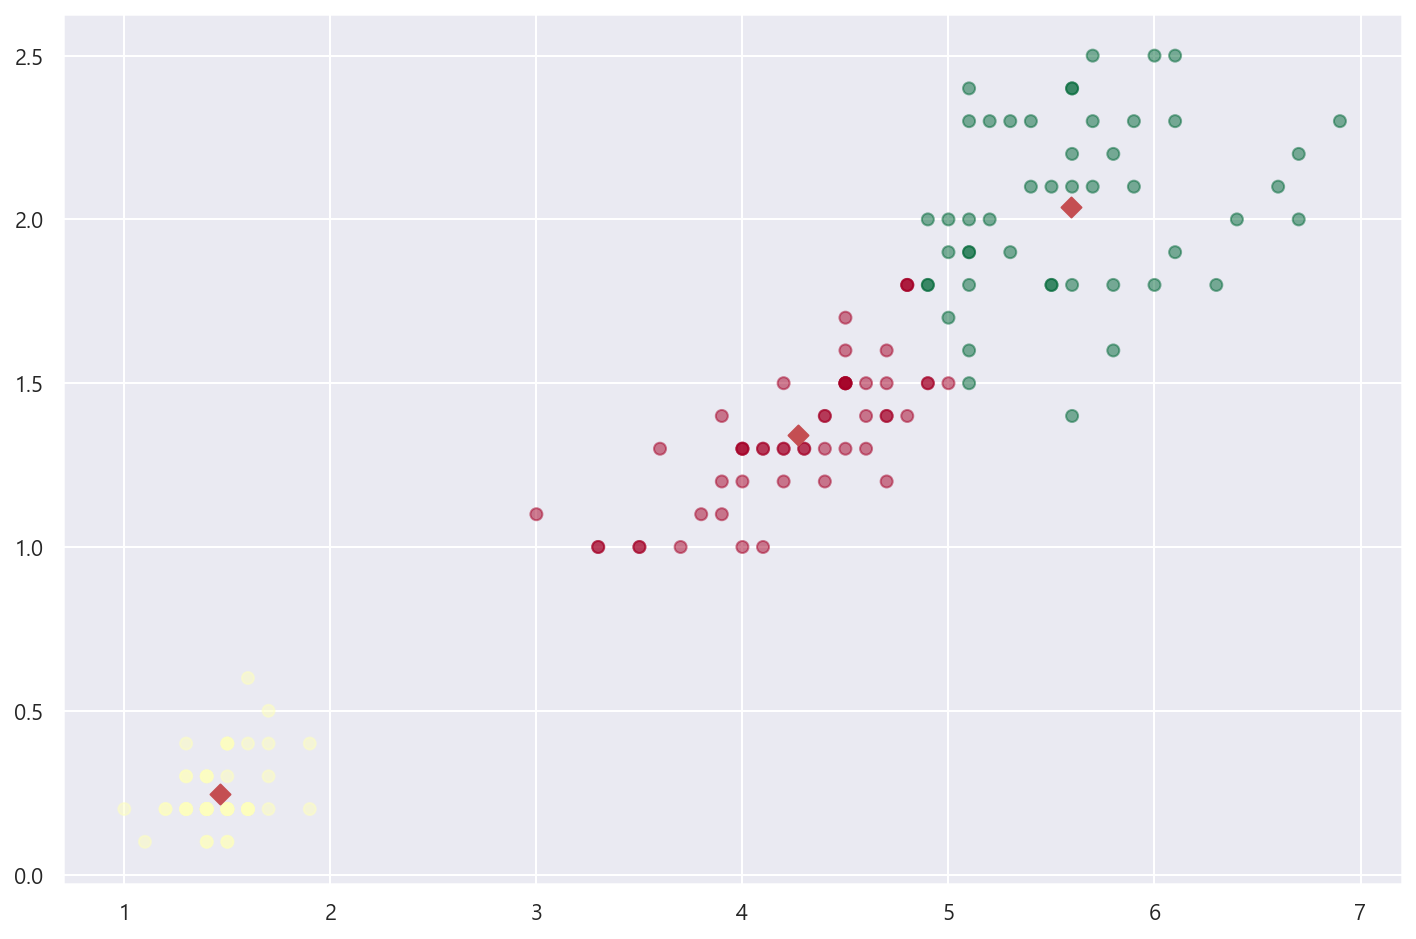

In [19]:
centers = pd.DataFrame(model.cluster_centers_,
                       columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'],
            c=feature['cluster'], alpha=0.5, cmap="RdYlGn")

plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

### 데이터 평가

In [12]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

### 군집결과 정리

In [13]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### 군집 결과 평가를 위한 작업

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value ', avg_value)
print('silhouette_sample( ) return 값의 shape', score_values.shape)

avg_value  0.5528190123564091
silhouette_sample( ) return 값의 shape (150,)


### 실루엣 플랏 함수
   - sklearn 공식 홈페이지

In [15]:
def visualize_silhouette(cluster_lists, X_features): 
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

### 결과

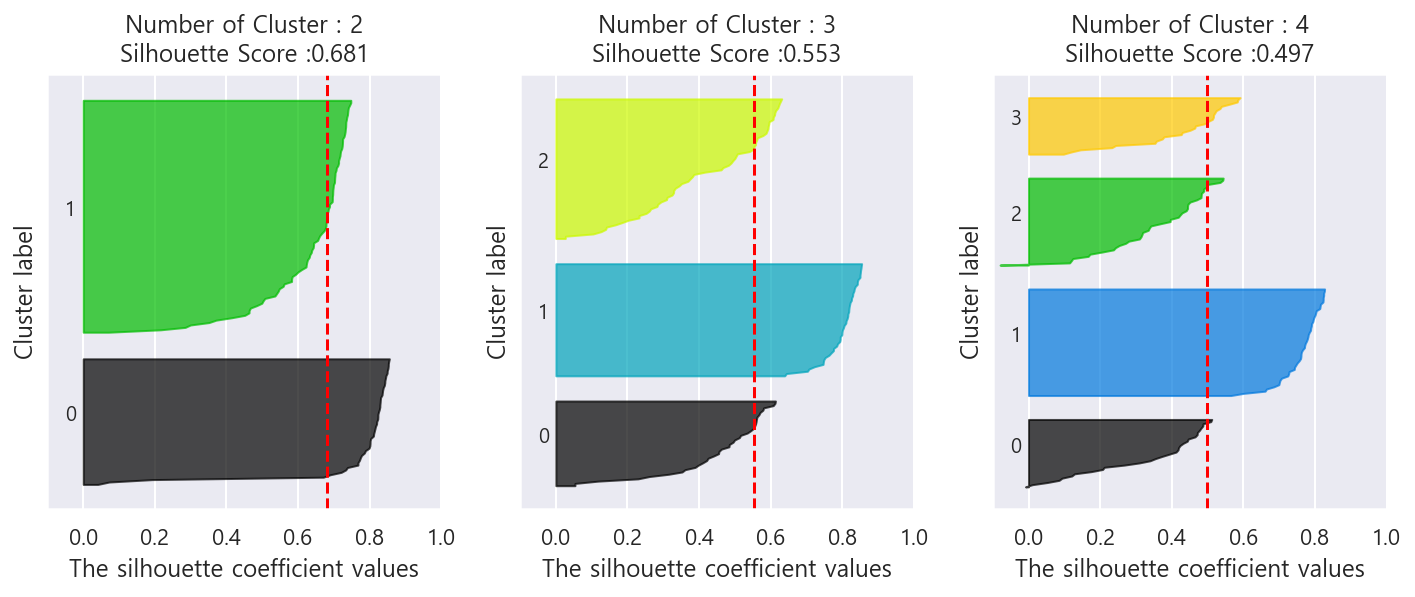

In [16]:
visualize_silhouette([2,3,4], iris.data)